计算不同天气条件下, 各污染物的变化情况，寻找之间的关系

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("/home/yuxk/mycode/MathModelng/WeatherForecast")

data_path = "./附件1 监测点A空气质量预报基础数据.xlsx"

df = pd.read_excel(data_path, sheet_name=1)
df.head()

,监测时间,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3监测浓度(μg/m³),CO监测浓度(mg/m³),温度(℃),湿度(%),气压(MBar),风速(m/s),风向(°)
0,2019-04-16 00:00:00,监测点A,5,75,61,38,1,1,21.1,89,1013,1.2,346.5
1,2019-04-16 01:00:00,监测点A,5,64,60,41,25,0.8,20.4,92,1012.4,1.1,18
2,2019-04-16 02:00:00,监测点A,4,60,36,40,25,0.8,20,93,1011.3,1.1,65.9
3,2019-04-16 03:00:00,监测点A,4,39,35,33,41,0.7,19.8,93,1010.4,1.5,78.4
4,2019-04-16 04:00:00,监测点A,4,39,28,39,36,0.8,19.9,92,1010,1.5,73.5


In [2]:
import matplotlib.pyplot as plt
import re

def str2num(st):
    st = str(st)
    date = st.split(" ")[0].split("-")
    time = st.split(" ")[-1].split(":")[0]
    return int(date[0][-2:] + date[1] + date[2] + time)

def count_row(df):
    rows = []
    for idx, row in df.iterrows():
        for i in row:
            # print(i)
            if i == "—":
                rows.append(idx)
                break
    return rows

def count_row_neg(df):
    rows = []
    for idx, row in df.iterrows():
        for i in row[2:8]:
            # print(i)
            if i < 0:
                rows.append(idx)
                break
    return rows

def save_dic(name, dic, path):
    with open(path, "a") as f:
            f.write(name+"\n")
    for key, value in dic.items():
        with open(path, "a") as f:
            f.write(key+":")
            f.write(str(value)+"\n")
        
    
     
df.dropna(inplace=True)
rows = count_row(df)
df.drop(index=rows, inplace=True)
rows = count_row_neg(df)
df.drop(index=rows, inplace=True)
df.to_csv("./data_h.csv", index=False)
x = df.iloc[:,2:8]
y = df.iloc[:,8:]
# x = x.apply(str2num)
# print(y.columns)
# plt.rcParams['font.sans-serif'] = ['KacstNaskh']
# print(plt.rcParams['font.sans-serif'])
# plt.plot(x[:20], y.iloc[:20, :], label=y.columns)
# plt.legend()
# plt.show()
dic_p = {}
dic_s = {}
for name, con in y.iteritems():
    corrs = []
    spearman = []
    for _, i in x.iteritems():
        corr = np.corrcoef(np.array(con, dtype=np.float32), np.array(i, dtype=np.float32))
        corrs.append(corr[0][1])
        spearman.append(con.corr(i, method='spearman'))
    dic_p[name] = corrs[:]
    dic_s[name] = spearman[:]
save_dic('pearson', dic_p, "./corrlate.txt")
save_dic('spearman', dic_s, "./corrlate.txt")





画图

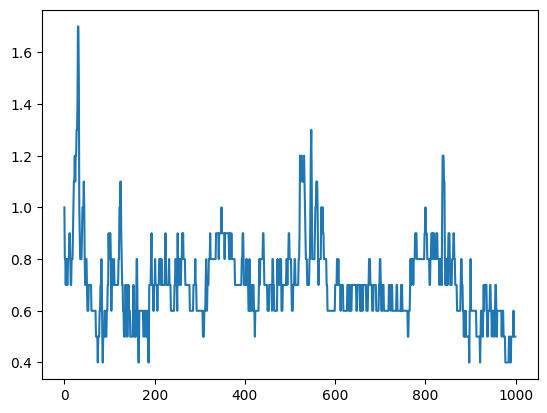

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./data_h.csv", index_col=False)
plt.plot(list(range(1000)), data.iloc[:1000,7])
plt.show()
